# Statistical Distributions

- def: math functions implemented with python code in the `scipy` library that we can use to model real-world processes

In [3]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

## Uniform Distribution

- discrete `randint`
- continous `uniform`

In [4]:
die_distribution = stats.randint(1, 7)
die_distribution

## Working with Distributions

- `.rvs`: random values, e.g. for simulation
- `.pmf` + `.pdf`: =
- `.cdf` + `.ppf`: <=
- `.sf` + `.isf`: >

In [6]:
# .rvs() is rolling a dice
die_distribution.rvs()

# rolling 100 dice, 2 times into a single array
die_distribution.rvs(100, 2)

array([1, 6, 1, 4, 3, 4, 1, 3, 2, 4, 6, 3, 5, 5, 5, 6, 4, 5, 3, 4, 4, 3,
       2, 3, 5, 4, 6, 1, 5, 4, 2, 3, 1, 5, 5, 3, 5, 3, 2, 1, 3, 6, 3, 2,
       6, 1, 2, 1, 3, 6, 2, 2, 2, 5, 3, 4, 1, 4, 1, 3, 3, 1, 5, 3, 1, 3,
       5, 2, 6, 4, 1, 3, 2, 5, 1, 2, 6, 2, 6, 6, 2, 3, 5, 3, 4, 5, 6, 3,
       1, 3, 4, 4, 1, 1, 6, 4, 6, 4, 6, 1])

In [8]:
die_distribution.rvs((5,2))

array([[1, 5],
       [6, 1],
       [4, 6],
       [3, 3],
       [5, 6]])

In [9]:
# what is ther likelyhood that we roll a 4?
die_distribution.pmf(4)

0.16666666666666666

In [10]:
# what is the liklihood thst we roll a 3 or less
die_distribution.cdf(3)

0.5

In [11]:
# Whats the liklihood that we roll grteater than 2?
die_distribution.sf(2)

0.6666666666666667

In [13]:
# there's a 1/6 chance i roll > than what number?

p = 1/6

die_distribution.isf(p)

5.0

In [14]:
#theres a 50% chance I roll what number or less?
die_distribution.ppf(.5)

3.0

## Normal Distribution

- continuous random var
- mean, $\mu$, the center
- standard deviation, $\sigma$, the "spread"

In [5]:
#creating a normal distribution
#coffee consumption per coghort, we consume 
#10 leiter per day with a standard deviation or 1
coffee_consumption = stats.norm(10, 1)
coffee_consumption

(array([  2.,   2.,   7.,  18.,  30.,  44.,  79., 145., 195., 376., 500.,
        608., 751., 865., 998., 960., 905., 867., 764., 588., 452., 312.,
        214., 124.,  96.,  54.,  17.,  19.,   6.,   2.]),
 array([ 6.21653066,  6.46116776,  6.70580487,  6.95044198,  7.19507908,
         7.43971619,  7.68435329,  7.9289904 ,  8.1736275 ,  8.41826461,
         8.66290171,  8.90753882,  9.15217592,  9.39681303,  9.64145013,
         9.88608724, 10.13072435, 10.37536145, 10.61999856, 10.86463566,
        11.10927277, 11.35390987, 11.59854698, 11.84318408, 12.08782119,
        12.33245829, 12.5770954 , 12.8217325 , 13.06636961, 13.31100672,
        13.55564382]),
 <a list of 30 Patch objects>)

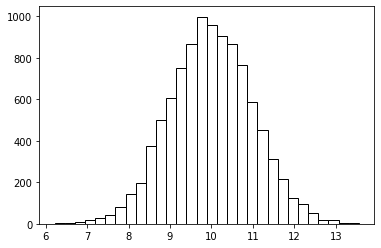

In [11]:
#visualizing our distribution
plt.hist(coffee_consumption.rvs(10_000), bins=30, fc='white', ec='black')



In [12]:
# what's the likelihood that we consume less than (or equal to) 8.5 
#liters of coffee in one day?
coffee_consumption.cdf(8.5)

0.06680720126885807

In [13]:
# how little coffee would we have to drink to be in the bottom quarter 
#of all days coffee consumptoion
coffee_consumption.ppf(.25)

9.325510249803918

 the average internet consumption for a neighborhood is 1250 GB
 +- 100GB historical average for the last 3 months
 
on monday we observed 1500GB of consumption. Assuming internet 
patterns havent changed how likely is it that we'd see this number
due to chance


In [17]:
stats.norm(1250, 100).sf(1500)
# is same as 

0.006209665325776132

In [16]:
internet_usage = stats.norm(1250, 100)
internet_usage.sf(1500)

0.006209665325776132

In [18]:
mean = 1250
std = 100
stats.norm(mean, std).sf(1500)

0.006209665325776132

In [20]:
# how much consumption constistutes the top 0.006209665325776132
# of all days?
internet_usage.isf(0.006209665325776132)

1500.0

In [21]:
# how much data usage constitutes the top 10% of all days
internet_usage.isf(.1)

1378.15515655446

In [22]:
internet_usage.ppf(.9)

1378.15515655446

(array([3.000e+00, 6.000e+00, 9.000e+00, 3.100e+01, 5.100e+01, 1.270e+02,
        2.340e+02, 4.490e+02, 8.500e+02, 1.474e+03, 2.350e+03, 3.433e+03,
        4.744e+03, 6.232e+03, 7.626e+03, 8.827e+03, 9.791e+03, 9.950e+03,
        9.640e+03, 8.532e+03, 7.435e+03, 5.816e+03, 4.407e+03, 3.030e+03,
        2.131e+03, 1.217e+03, 7.650e+02, 4.270e+02, 2.240e+02, 1.010e+02,
        4.800e+01, 2.300e+01, 1.000e+01, 2.000e+00, 5.000e+00]),
 array([ 815.5890921 ,  840.55805486,  865.52701762,  890.49598039,
         915.46494315,  940.43390591,  965.40286868,  990.37183144,
        1015.3407942 , 1040.30975696, 1065.27871973, 1090.24768249,
        1115.21664525, 1140.18560802, 1165.15457078, 1190.12353354,
        1215.0924963 , 1240.06145907, 1265.03042183, 1289.99938459,
        1314.96834735, 1339.93731012, 1364.90627288, 1389.87523564,
        1414.84419841, 1439.81316117, 1464.78212393, 1489.75108669,
        1514.72004946, 1539.68901222, 1564.65797498, 1589.62693775,
        1614.59590051

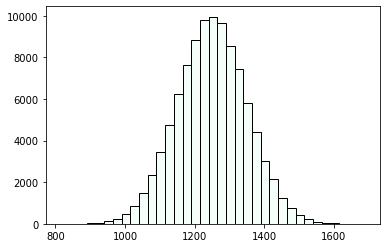

In [24]:
plt.hist(internet_usage.rvs(100_000), bins=35, ec='black', fc='mintcream')

## Binomial Distribution

- discrete random var: number of "successes"
- $n$, number of trials
    - outcome of one trial is binary, yes or no
- $p$, probability of success for one trial

In [30]:
# theres a 70% chance a food truck shows up. Whats the likelihood
# a food truck shows up 2 days out of the week?

# outcome: # of days a food truck shows up
# n == 5 (5 days in a week)
# p == .70 (70% chance a food truck shows up)
n = 5
p = .3

stats.binom(n, p).pmf(2)

0.3086999999999999

Text(0, 0.5, 'probability of this outcome')

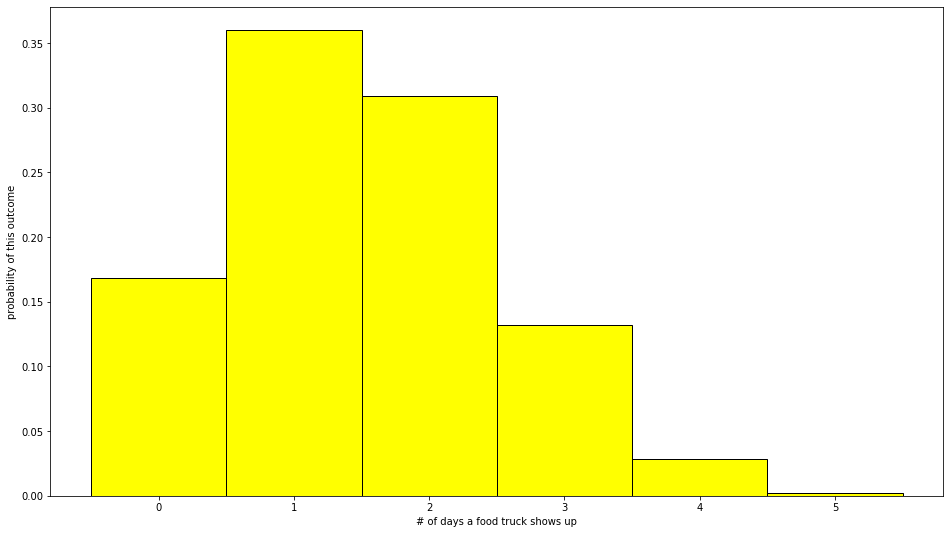

In [31]:
plt.figure(figsize=(16,9))
x = np.arange(0, 6)
y = stats.binom(n, p).pmf(x)

plt.bar(x, y, width=1, ec='black', fc='yellow')
plt.xlabel('# of days a food truck shows up')
plt.ylabel('probability of this outcome')

In [32]:
# what's the likelihood that a food truck shoes up 3 or less days 
# out of the week

n = 5
p = .7

stats.binom(n, p).cdf(3)

# 47% chance out of the week that theres a food truck at
# travis park

0.47178000000000003

In [33]:
# what's the likelihood that a food truck shows up > than
# 3 days out of the week

#since we dont have a function that answers our question
# but we do have a discrete distribution here
# we can rephrase the question 
#likelihood a food truck shows up 2 or less days of the week
stats.binom(n, p).cdf(2)

0.16308000000000006

In [35]:
# p(less than 3 days) is equal to
# p(3 or less days) - p(3)
stats.binom(n, p).cdf(3) - stats.binom(n, p).pmf(3)

0.1630800000000001


---

say you go to the grocery store and theres a 80% chance they have
toilet paper.

If everyone in curie goes to the store how likely is it that
we can all buy toilet paper?

In [39]:
n = 17
p = .8

stats.binom(n, p).pmf(n) #likelihood that all trials are success

0.0225179981368525

suppose theres a suprise stats quiz this afternoon, and you 
haven't studied. there's 10 multiple choice questions, each with 4 answers. If you guess at random for each question. what's the likelihood that you will pass the quiz?

In [42]:
n = 10
p = .25

stats.binom(n, p).sf(6) # 7 or more correct

0.003505706787109374

## Poisson Distribution

- discrete random var: number of events
- $\lambda$: avg rate over time

suppose we ask 3.5 questions per lecture. What is the likelihood that more than 4 questions are aked during thee statistical distribution lesson?

In [44]:
stats.poisson(3.5).sf(4)

0.2745550466903957

Text(0.5, 0, 'questions')

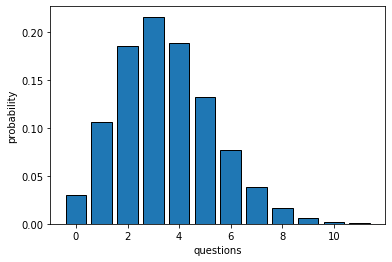

In [47]:
x = np.arange(0, 12)
y = stats.poisson(3.5).pmf(x)

plt.bar(x, y, ec='black')
plt.ylabel('probability')
plt.xlabel('questions')

>difference between poisson and binomial distribution, is that binomial dist. is fixed, and poisson doesnt have an endcap


In [49]:
# what is the likelihood that 2 or fewer questions are asked?
stats.poisson(3.5).cdf(2)

0.32084719886213414

In [52]:
# For modeling food trucks we used binomial dist.
# given P(food trucks shows up one day), number of days

# for a  poisson dist. , we need an average rate over time
# given number of food trucks per week
# on average 3 food trucks show up per week

# for a given week whats the likelihood that a food truck
# shows up everyday? -- p(5 or more food trucks)

# we dont have a function for 5 or more but we do have a function
#for more than and we will use .sf
stats.poisson(3).sf(4)

0.18473675547622787

<BarContainer object of 9 artists>

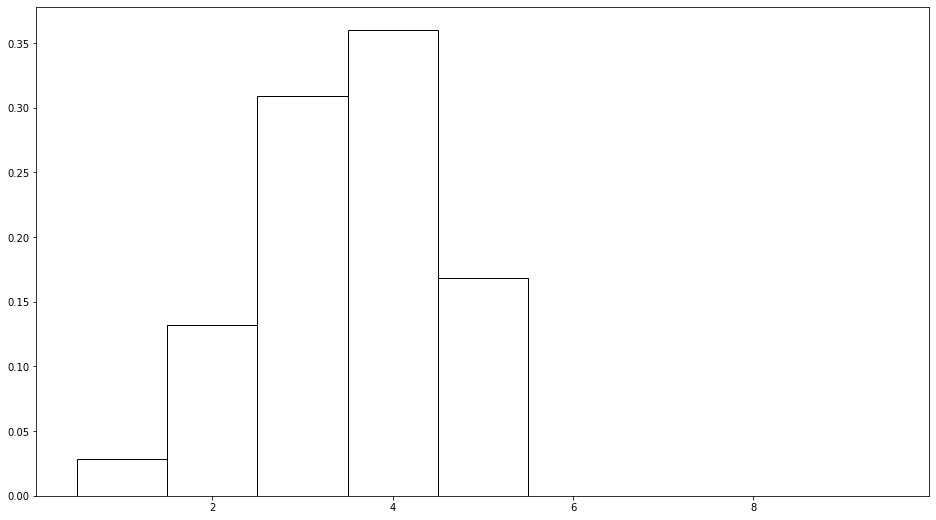

In [56]:
n = 5
p = .7

x = np.arange(1, 10)
y = stats.binom(n, p).pmf(x)

plt.figure(figsize=(16,9))
plt.bar(x, y, ec='black', fc='white', width=1)

differences between the poisson and binomial dist.

- poisson is deined by an averge rte over time
- poisson has no upper bound on number of events
- binomial is defined by a chance of success and a number of trials
- binomial 